In [32]:
from PIL import Image

In [33]:
init_img = Image.open("/home/pawel/git/NeuralNetworksSketchbook/src/depth_interior.png").convert("RGB")

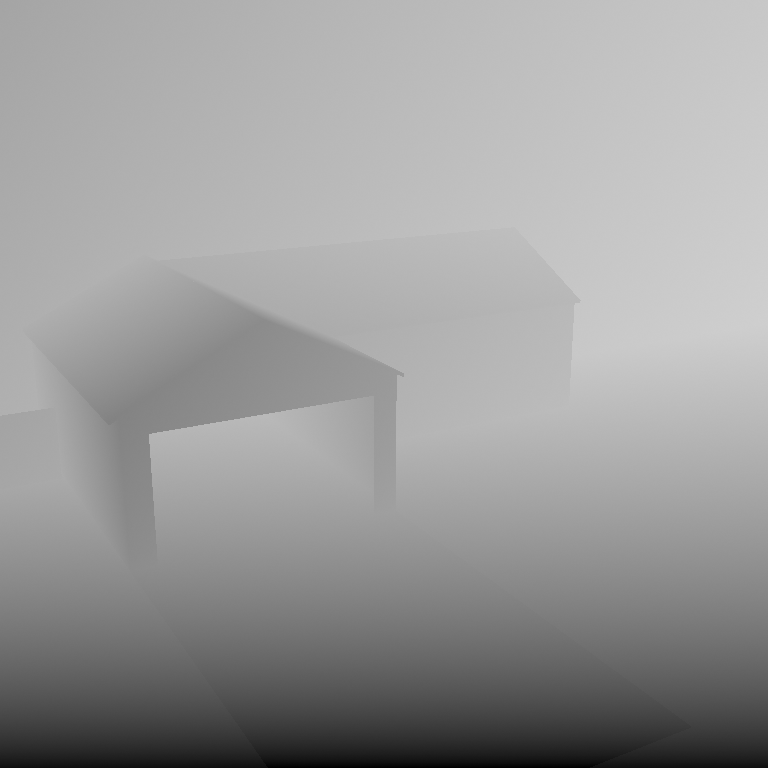

In [34]:
import numpy as np
init_img

In [35]:
import torch
import requests
from diffusers import StableDiffusionDepth2ImgPipeline

pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
   "stabilityai/stable-diffusion-2-depth",
   torch_dtype=torch.float16,
).to("cuda")


Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

In [36]:
depth = init_img.copy()
depth.thumbnail((384, 384),Image.ANTIALIAS)
depth = depth.convert('1')
depth = torch.Tensor(np.array(depth)).unsqueeze(0)
depth *= 600
#depth += 600
depth.shape, depth.min(), depth.max()

/tmp/ipykernel_11336/901442201.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  depth.thumbnail((384, 384),Image.ANTIALIAS)


(torch.Size([1, 384, 384]), tensor(0.), tensor(600.))

  0%|          | 0/50 [00:00<?, ?it/s]

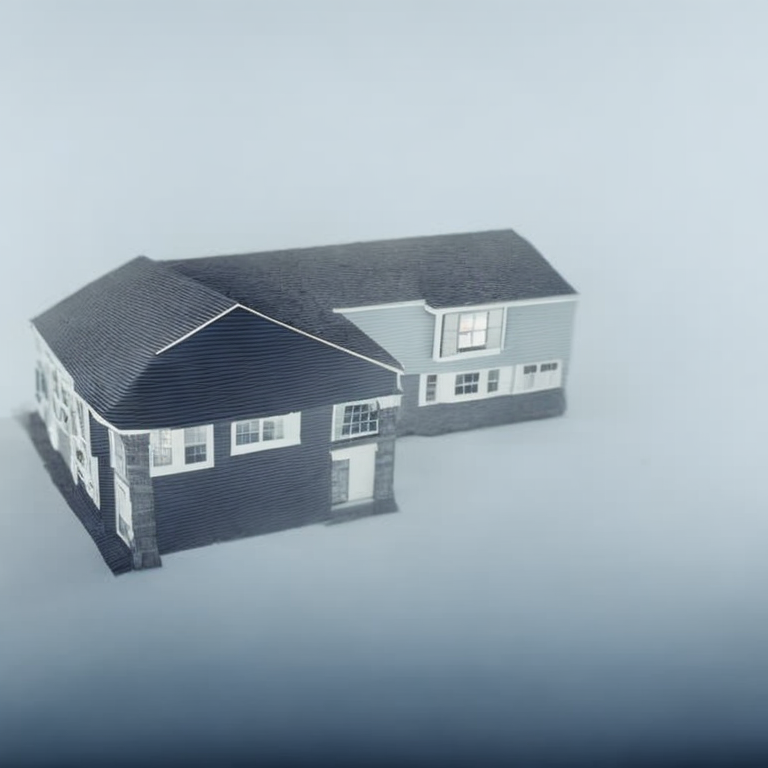

In [38]:
i = 1037
generator = torch.Generator(device="cuda").manual_seed(i)
prompt = "An american suburbs house"
n_propmt = ""
imgs = pipe(prompt=prompt, image=init_img, depth_map=depth, negative_prompt=n_propmt, guidance_scale=9, strength=1.0, generator=generator).images

imgs[0]